# Assignment 1, Deep Learning Fundamentals

###

In [1]:
### goal
## for improvement need to write the goal to improve with the scientific purpose - 
## How to get best learning rate / hyperparameter and how to evalutae and explain the results.

## Import Library

In [2]:

from __future__ import print_function
## Data manioulation
import pandas as pd
import numpy as np
## visualization
import plotly
import matplotlib.pyplot as plt
import seaborn as sns

## NN
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# device = torch.device("cpu")
device = torch.device("cuda:0") # Uncomment this to run on GPU

def set_seeds(seed_value):
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed_value)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seeds(1311)

## Import dataset

In [4]:
## import dataset
db_df = pd.read_csv('sc/diabetes.csv')

## view top 5 rows
db_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# reference the original columns
df_column = ['Outcome']
df_column.extend(db_df.columns[:8])
df_column

# Define column names for the DataFrame
columns = ['label'] + [f'feature_{i}' for i in range(1, 9)]

# Read the file and create a DataFrame
df_scale = pd.DataFrame(columns=columns)

with open('sc/diabetes_scale.txt', 'r') as file:
    for line in file.readlines():
        tokens = line.split()
        label = int(tokens[0])
        features = [0] * 8  # Adjust according to the actual number of features
        for token in tokens[1:]:
            index, value = token.split(":")
            features[int(index) - 1] = float(value)
        df_scale = df_scale.append(pd.Series([label] + features, index=columns), ignore_index=True)

df_scale.columns = df_column

## view data summary
print(f"----- Show data summary of df_scale -----")
df_scale.info()

## view top 5 rows
print(f"----- Show top 5 rows of df_scale -----\n {df_scale.head()}")


----- Show data summary of df_scale -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Outcome                   768 non-null    float64
 1   Pregnancies               768 non-null    float64
 2   Glucose                   768 non-null    float64
 3   BloodPressure             768 non-null    float64
 4   SkinThickness             768 non-null    float64
 5   Insulin                   768 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB
----- Show top 5 rows of df_scale -----
    Outcome  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0     -1.0    -0.294118  0.487437       0.180328      -0.292929 -1.000000   
1      1.0   

### EDA

In [6]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def plot_boxplot_facet(df):
    
    # create the 
    fig = make_subplots(rows=len(df.columns), cols=1)

    for j,i in enumerate(df.columns):
        fig.add_trace(go.Box(
            x=df[i],
            name= i,
            boxpoints='suspectedoutliers', # only suspected outliers
            marker=dict(
                color='rgb(8,81,156)',
                outliercolor='rgba(219, 64, 82, 0.6)',
                line=dict(
                    outliercolor='rgba(219, 64, 82, 0.6)',
                    outlierwidth=2)),
            line_color='rgb(8,81,156)'
            ), 
            row=j+1, col= 1
            )
    
    fig.update_layout(title_text="Box Plot Styling Outliers",
                    #   width=500,
                    height=1000,
                    )
    fig.show()
    
    
def plot_histrogram_facet(df):
    
    # create the 
    fig = make_subplots(rows=len(df.columns), cols=1)

    for j,i in enumerate(df.columns):
        fig.add_trace(go.Histogram(
            x=df[i],
            name= i,
            marker=dict(
                color='rgb(8,81,156)')
            ), 
            row=j+1, col= 1
            )
    
    fig.update_layout(title_text="Box Plot Styling Outliers",
                    #   width=300,
                      height=2000,
                    )
    fig.show()

#### Show the data distribution of original dataset

In [7]:
plot_boxplot_facet(db_df)
plot_histrogram_facet(db_df)

#### Show the data distribution of df_scale

In [8]:
plot_boxplot_facet(df_scale)
plot_histrogram_facet(df_scale)

#### Show the pairplot of original dataset

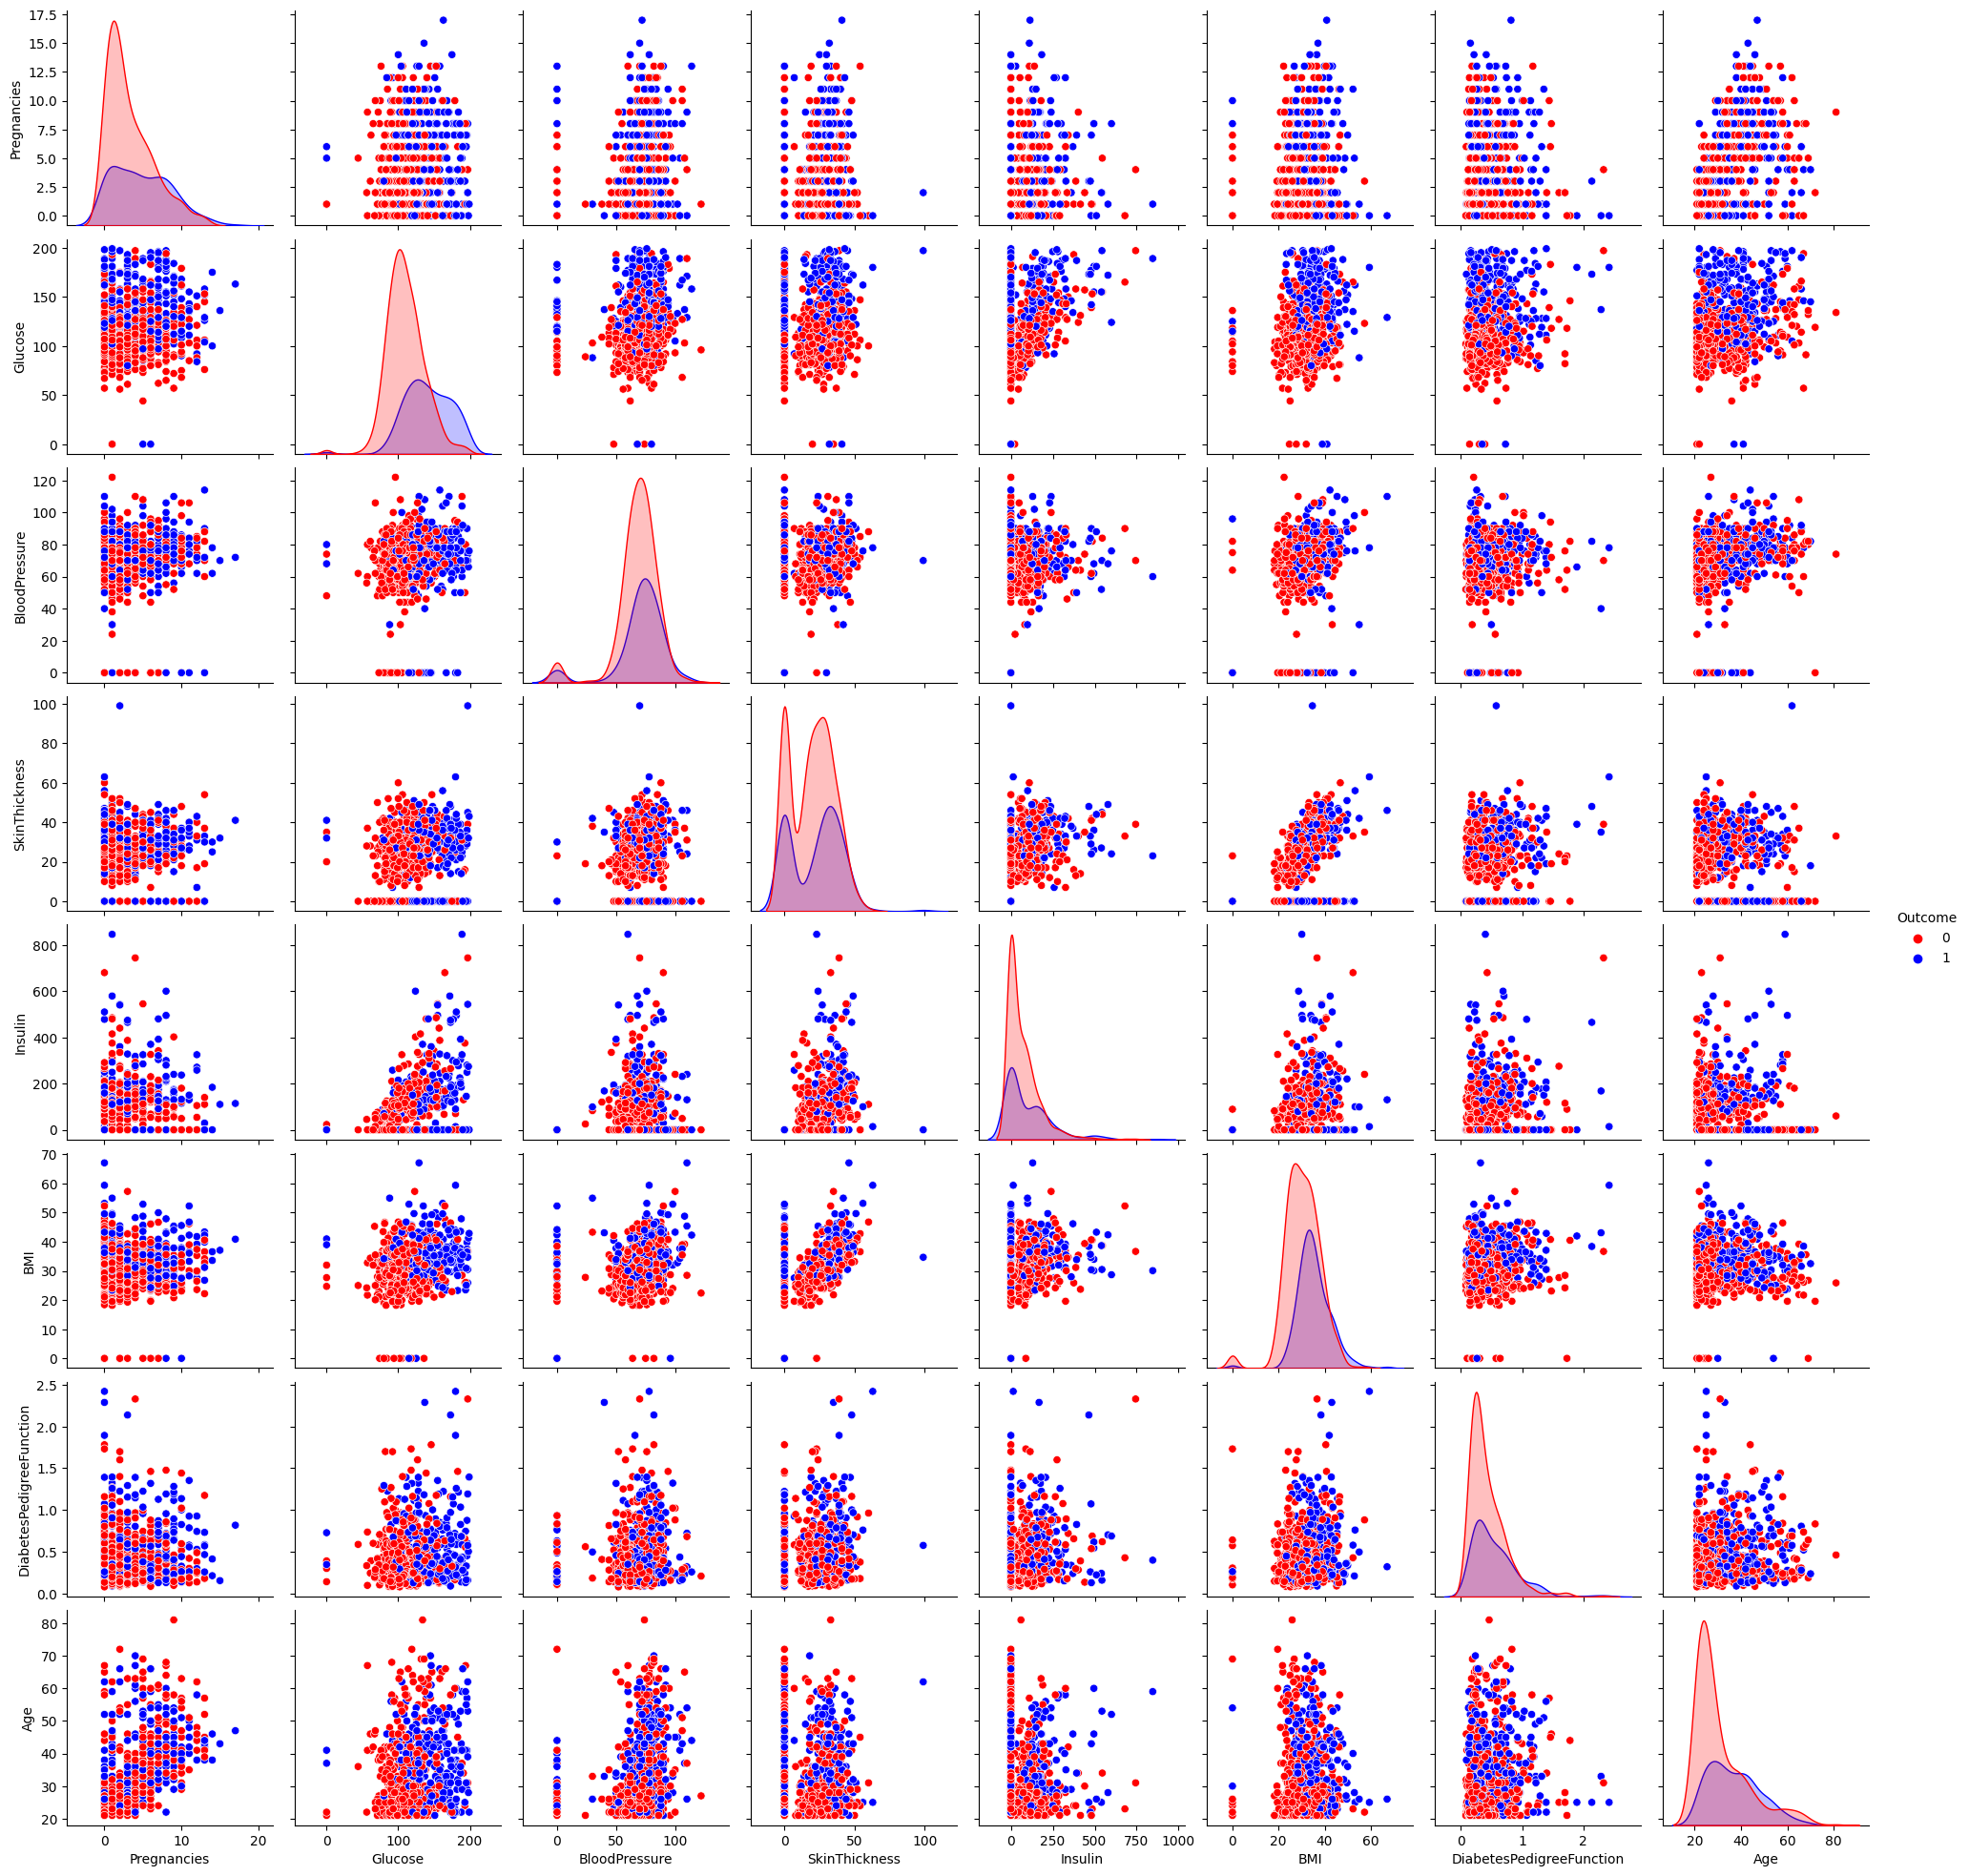

In [9]:
sns.pairplot(db_df,hue='Outcome',palette=['r','b'])

## Data Preprocessing

In [10]:


# Separate features and labels
X = df_scale.drop('Outcome', axis=1)  # Replace 'outcome' with the actual column name of your outcome variable
y = df_scale['Outcome']

# Split the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=0000)

# Convert to PyTorch tensors
# X_train_tensor = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).reshape(-1, 1)
# X_test_tensor = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).reshape(-1, 1)

## Calculated Function

In [11]:
# Defining functions for getting accuracy and training the network.
def get_accuracy(pred_arr, original_arr):
    pred_arr = (pred_arr >= 0.5).float()*2 - 1  # Convert probabilities to binary predictions
    correct = (pred_arr == original_arr).float().sum()
    return (correct / original_arr.numel()) * 100  # use numel to get the number of elements in the tensor

def train_network(model, optimizer, criterion, X_train, y_train, X_test, y_test, num_epochs):
    train_loss=[]
    train_accuracy=[]
    test_accuracy=[]

    for epoch in range(num_epochs):
        #forward feed
        output_train = model(X_train)
        train_accuracy.append(get_accuracy(output_train, y_train))
        #calculate the loss
        loss = criterion(output_train, y_train)
        train_loss.append(loss.item())

        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()

        #backward propagation: calculate gradients
        loss.backward()

        #update the weights
        optimizer.step()

        with torch.no_grad():
            output_test = model(X_test)
            test_accuracy.append(get_accuracy(output_test, y_test))

        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy[-1]:.2f}, Test Accuracy: {test_accuracy[-1]:.2f}")

    return train_loss, train_accuracy, test_accuracy

In [12]:
def plot_performance_loss(metric):
    
    df = pd.DataFrame(dict(
        epoch = [i+1 for i in range(len(metric[0]))],
        train_loss = metric[0],
        train_accuracy = [ float(i) for i in metric[1] ],
        test_accuracy = [ float(i) for i in metric[2] ]
    ))
    
    plt.figure()
    plt.plot(df['epoch'], df['train_loss'])  

    plt.xlabel("Epoch")
    plt.ylabel("Binary Loss")
    plt.show()

In [13]:
def plot_performance_accuracy(metric):
    
    df = pd.DataFrame(dict(
        epoch = [i+1 for i in range(len(metric[0]))],
        train_loss = metric[0],
        train_accuracy = [ float(i) for i in metric[1] ],
        test_accuracy = [ float(i) for i in metric[2] ]
    ))
    
    plt.figure()
    plt.plot(df['epoch'], df['train_accuracy'])  
    plt.plot(df['epoch'], df['test_accuracy'], 
         color='red',   
         linewidth=1.0,  
         linestyle='--' 
        )

    plt.xlabel("Epoch")
    plt.ylabel("Model Accuracy")
    plt.show()

## Perceptron Algorithm

Epoch 100/1000, Train Loss: -0.0995, Train Accuracy: 67.71, Test Accuracy: 67.71
Epoch 200/1000, Train Loss: -0.4525, Train Accuracy: 67.88, Test Accuracy: 67.71
Epoch 300/1000, Train Loss: -0.7287, Train Accuracy: 67.71, Test Accuracy: 67.19
Epoch 400/1000, Train Loss: -0.9765, Train Accuracy: 67.53, Test Accuracy: 66.15
Epoch 500/1000, Train Loss: -1.2098, Train Accuracy: 67.53, Test Accuracy: 66.15
Epoch 600/1000, Train Loss: -1.4281, Train Accuracy: 67.71, Test Accuracy: 66.15
Epoch 700/1000, Train Loss: -1.6384, Train Accuracy: 67.71, Test Accuracy: 66.15
Epoch 800/1000, Train Loss: -1.8343, Train Accuracy: 67.53, Test Accuracy: 66.15
Epoch 900/1000, Train Loss: -1.9992, Train Accuracy: 67.53, Test Accuracy: 66.15
Epoch 1000/1000, Train Loss: -2.1473, Train Accuracy: 67.88, Test Accuracy: 65.62


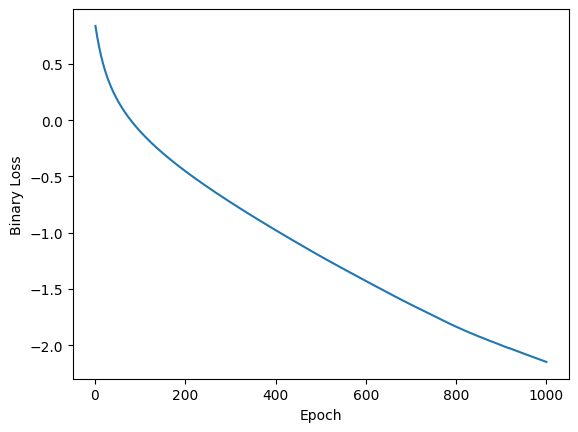

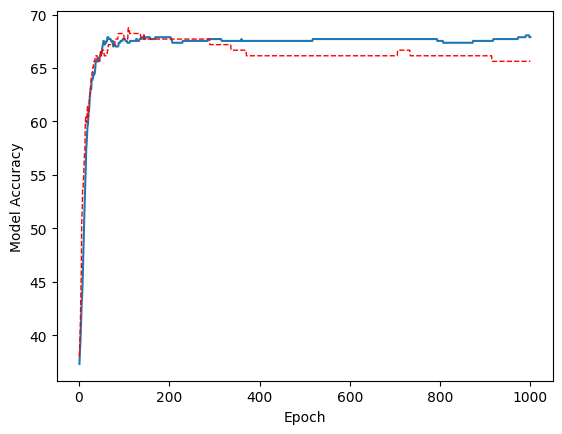

In [14]:
## model setting
class SingleLayerPerceptron(nn.Module):
    def __init__(self, input_size):
        super(SingleLayerPerceptron, self).__init__()
        self.layer = torch.nn.Linear(input_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.layer(x)
        x = self.sigmoid(x)
        return x
    
## Initialize the Model
num_epochs = 1000
learning_rate = 0.05

torch.manual_seed(0)
model = SingleLayerPerceptron(input_size=8)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)  # You can adjust the learning rate

train_loss, train_accuracy, test_accuracy = train_network(model=model, 
                                                          optimizer=optimizer, 
                                                          criterion=criterion, 
                                                          X_train=X_train_tensor, 
                                                          y_train=y_train_tensor, 
                                                          X_test=X_test_tensor, 
                                                          y_test=y_test_tensor, 
                                                          num_epochs=num_epochs
                                                          )
metric_output = [train_loss, train_accuracy, test_accuracy]
plot_performance_loss(metric_output)
plot_performance_accuracy(metric_output)

## Multilayer Preceptron Algorithm

### SLP with vary the optimizer - SGD look nice

Epoch 100/1000, Train Loss: -0.0564, Train Accuracy: 64.93, Test Accuracy: 62.50
Epoch 200/1000, Train Loss: -0.4535, Train Accuracy: 64.41, Test Accuracy: 63.02
Epoch 300/1000, Train Loss: -0.7947, Train Accuracy: 65.10, Test Accuracy: 62.50
Epoch 400/1000, Train Loss: -1.1270, Train Accuracy: 65.45, Test Accuracy: 62.50
Epoch 500/1000, Train Loss: -1.4463, Train Accuracy: 65.28, Test Accuracy: 63.02
Epoch 600/1000, Train Loss: -1.7177, Train Accuracy: 65.97, Test Accuracy: 62.50
Epoch 700/1000, Train Loss: -1.9554, Train Accuracy: 65.97, Test Accuracy: 62.50
Epoch 800/1000, Train Loss: -2.1717, Train Accuracy: 65.80, Test Accuracy: 62.50
Epoch 900/1000, Train Loss: -2.3669, Train Accuracy: 65.97, Test Accuracy: 63.02
Epoch 1000/1000, Train Loss: -2.5227, Train Accuracy: 65.97, Test Accuracy: 62.50


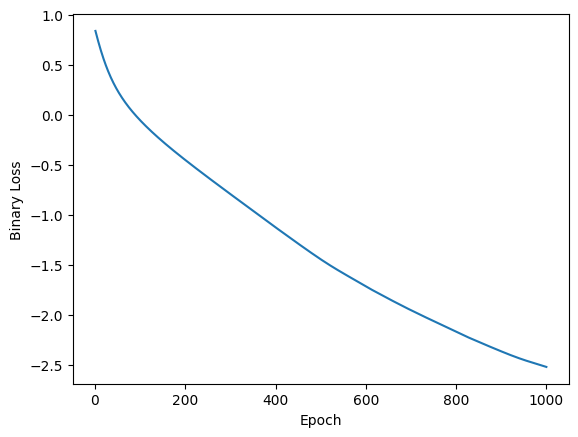

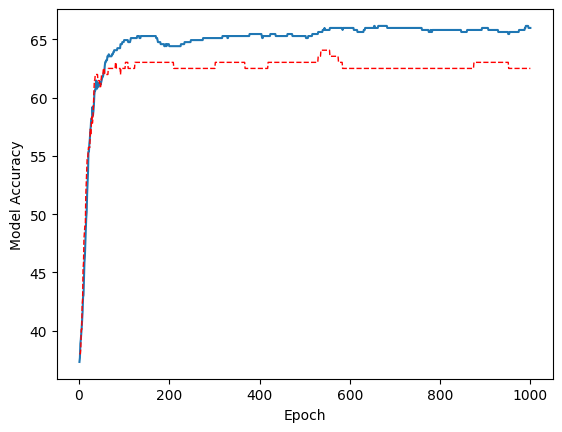

Epoch 100/1000, Train Loss: 0.4623, Train Accuracy: 60.42, Test Accuracy: 60.94
Epoch 200/1000, Train Loss: 0.2503, Train Accuracy: 65.62, Test Accuracy: 65.62
Epoch 300/1000, Train Loss: 0.1053, Train Accuracy: 67.53, Test Accuracy: 66.15
Epoch 400/1000, Train Loss: -0.0074, Train Accuracy: 67.01, Test Accuracy: 67.19
Epoch 500/1000, Train Loss: -0.1016, Train Accuracy: 67.71, Test Accuracy: 68.23
Epoch 600/1000, Train Loss: -0.1842, Train Accuracy: 67.53, Test Accuracy: 68.23
Epoch 700/1000, Train Loss: -0.2588, Train Accuracy: 67.88, Test Accuracy: 67.71
Epoch 800/1000, Train Loss: -0.3277, Train Accuracy: 67.71, Test Accuracy: 67.71
Epoch 900/1000, Train Loss: -0.3924, Train Accuracy: 67.88, Test Accuracy: 67.71
Epoch 1000/1000, Train Loss: -0.4538, Train Accuracy: 67.88, Test Accuracy: 67.71


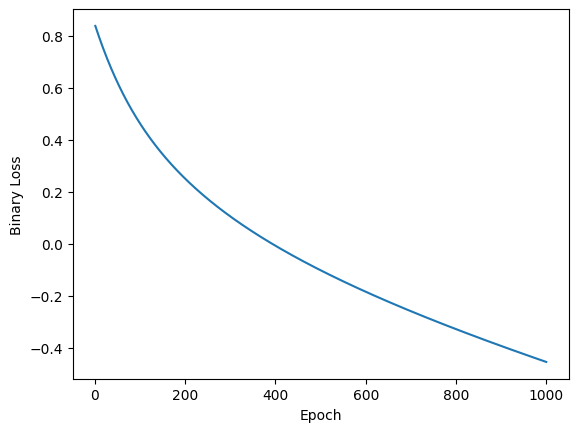

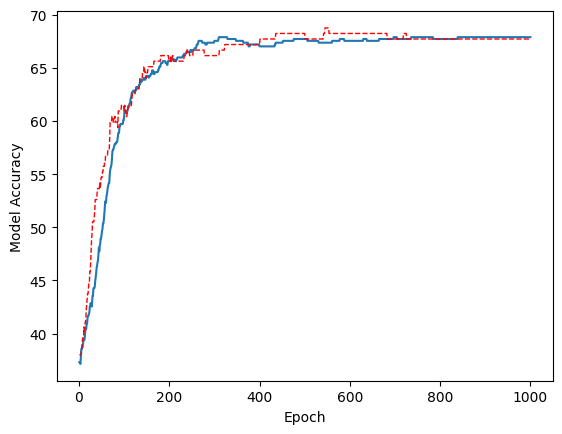

Epoch 100/1000, Train Loss: -0.5067, Train Accuracy: 65.45, Test Accuracy: 63.02
Epoch 200/1000, Train Loss: -0.9737, Train Accuracy: 65.45, Test Accuracy: 62.50
Epoch 300/1000, Train Loss: -1.3908, Train Accuracy: 66.15, Test Accuracy: 63.02
Epoch 400/1000, Train Loss: -1.7349, Train Accuracy: 66.15, Test Accuracy: 62.50
Epoch 500/1000, Train Loss: -2.0409, Train Accuracy: 65.97, Test Accuracy: 62.50
Epoch 600/1000, Train Loss: -2.3214, Train Accuracy: 65.62, Test Accuracy: 61.46
Epoch 700/1000, Train Loss: -2.5336, Train Accuracy: 65.45, Test Accuracy: 61.46
Epoch 800/1000, Train Loss: -2.6826, Train Accuracy: 65.80, Test Accuracy: 61.98
Epoch 900/1000, Train Loss: -2.8216, Train Accuracy: 66.32, Test Accuracy: 61.98
Epoch 1000/1000, Train Loss: -2.6218, Train Accuracy: 67.19, Test Accuracy: 61.98


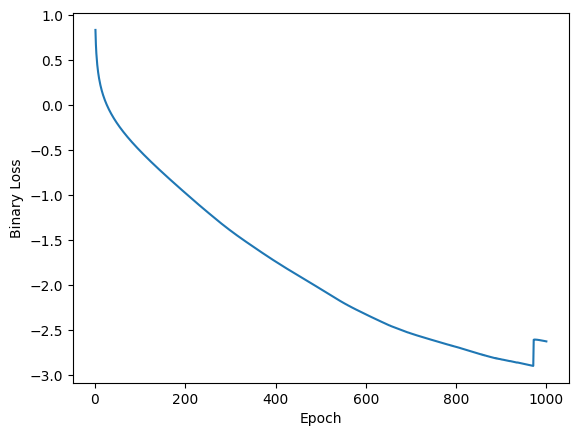

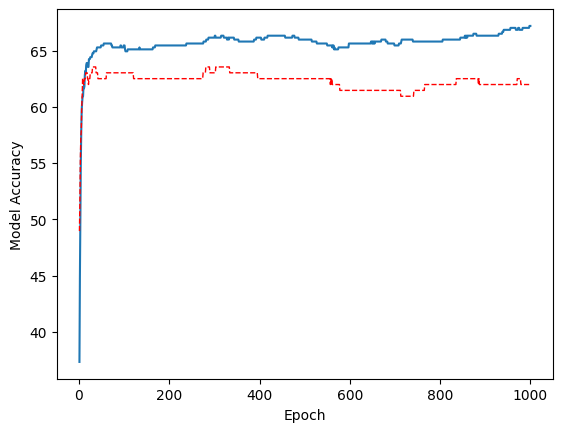

In [15]:
## Initialize the Model
num_epochs = 1000
learning_rate = 0.01

for i,opt in enumerate([torch.optim.Adam, torch.optim.SGD, torch.optim.RMSprop]):
    torch.manual_seed(0)
    model = SingleLayerPerceptron(input_size=8)
    criterion = nn.BCELoss()
    optimizer = opt(model.parameters(), lr=learning_rate)  # You can adjust the learning rate

    train_loss, train_accuracy, test_accuracy = train_network(model=model, 
                                                            optimizer=optimizer, 
                                                            criterion=criterion, 
                                                            X_train=X_train_tensor, 
                                                            y_train=y_train_tensor, 
                                                            X_test=X_test_tensor, 
                                                            y_test=y_test_tensor, 
                                                            num_epochs=num_epochs
                                                            )
    metric_output[i] = [train_loss, train_accuracy, test_accuracy]
    plot_performance_loss(metric_output[i] )
    plot_performance_accuracy(metric_output[i])

### SLP with vary the learning rate - 0.01

The selected learning rate: 0.1
Epoch 100/1000, Train Loss: -0.4510, Train Accuracy: 67.88, Test Accuracy: 67.71
Epoch 200/1000, Train Loss: -0.9754, Train Accuracy: 67.53, Test Accuracy: 66.15
Epoch 300/1000, Train Loss: -1.4272, Train Accuracy: 67.71, Test Accuracy: 66.15
Epoch 400/1000, Train Loss: -1.8336, Train Accuracy: 67.53, Test Accuracy: 66.15
Epoch 500/1000, Train Loss: -2.1470, Train Accuracy: 67.88, Test Accuracy: 65.62
Epoch 600/1000, Train Loss: -2.1124, Train Accuracy: 67.36, Test Accuracy: 65.62
Epoch 700/1000, Train Loss: -2.2933, Train Accuracy: 66.84, Test Accuracy: 64.58
Epoch 800/1000, Train Loss: -2.4459, Train Accuracy: 66.67, Test Accuracy: 64.58
Epoch 900/1000, Train Loss: -2.5683, Train Accuracy: 66.84, Test Accuracy: 64.58
Epoch 1000/1000, Train Loss: -2.6656, Train Accuracy: 67.36, Test Accuracy: 65.10


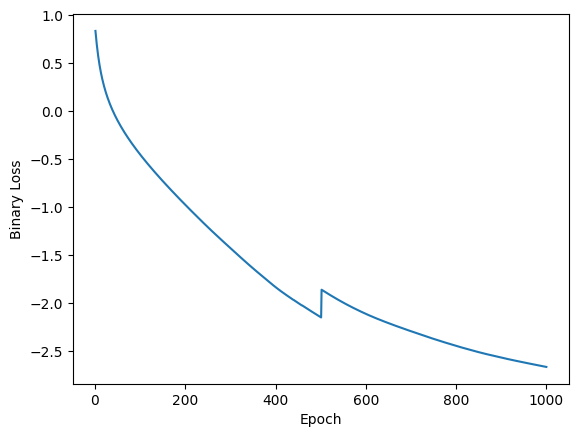

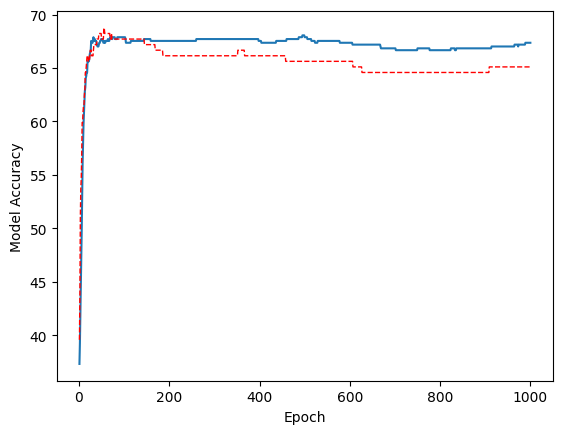

The selected learning rate: 0.05
Epoch 100/1000, Train Loss: -0.0995, Train Accuracy: 67.71, Test Accuracy: 67.71
Epoch 200/1000, Train Loss: -0.4525, Train Accuracy: 67.88, Test Accuracy: 67.71
Epoch 300/1000, Train Loss: -0.7287, Train Accuracy: 67.71, Test Accuracy: 67.19
Epoch 400/1000, Train Loss: -0.9765, Train Accuracy: 67.53, Test Accuracy: 66.15
Epoch 500/1000, Train Loss: -1.2098, Train Accuracy: 67.53, Test Accuracy: 66.15
Epoch 600/1000, Train Loss: -1.4281, Train Accuracy: 67.71, Test Accuracy: 66.15
Epoch 700/1000, Train Loss: -1.6384, Train Accuracy: 67.71, Test Accuracy: 66.15
Epoch 800/1000, Train Loss: -1.8343, Train Accuracy: 67.53, Test Accuracy: 66.15
Epoch 900/1000, Train Loss: -1.9992, Train Accuracy: 67.53, Test Accuracy: 66.15
Epoch 1000/1000, Train Loss: -2.1473, Train Accuracy: 67.88, Test Accuracy: 65.62


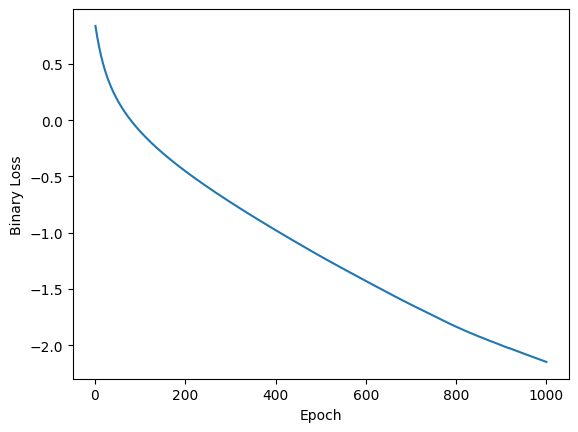

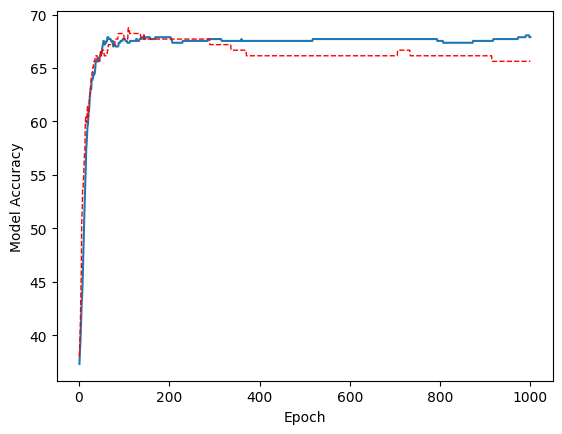

The selected learning rate: 0.01
Epoch 100/1000, Train Loss: 0.4623, Train Accuracy: 60.42, Test Accuracy: 60.94
Epoch 200/1000, Train Loss: 0.2503, Train Accuracy: 65.62, Test Accuracy: 65.62
Epoch 300/1000, Train Loss: 0.1053, Train Accuracy: 67.53, Test Accuracy: 66.15
Epoch 400/1000, Train Loss: -0.0074, Train Accuracy: 67.01, Test Accuracy: 67.19
Epoch 500/1000, Train Loss: -0.1016, Train Accuracy: 67.71, Test Accuracy: 68.23
Epoch 600/1000, Train Loss: -0.1842, Train Accuracy: 67.53, Test Accuracy: 68.23
Epoch 700/1000, Train Loss: -0.2588, Train Accuracy: 67.88, Test Accuracy: 67.71
Epoch 800/1000, Train Loss: -0.3277, Train Accuracy: 67.71, Test Accuracy: 67.71
Epoch 900/1000, Train Loss: -0.3924, Train Accuracy: 67.88, Test Accuracy: 67.71
Epoch 1000/1000, Train Loss: -0.4538, Train Accuracy: 67.88, Test Accuracy: 67.71


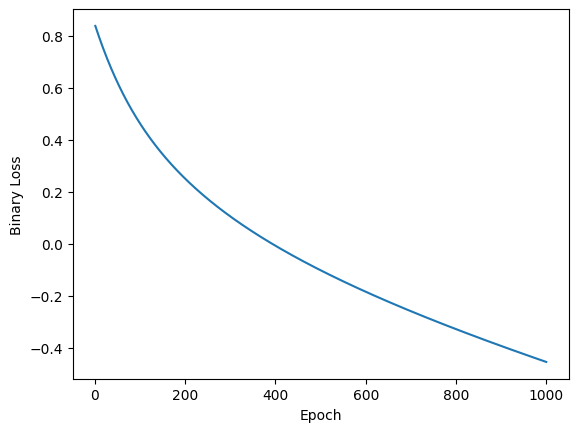

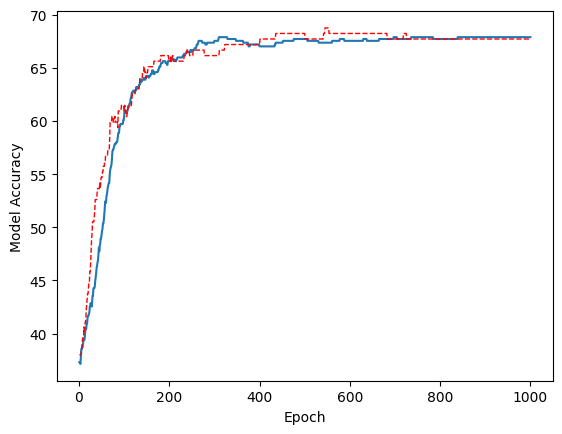

The selected learning rate: 0.001
Epoch 100/1000, Train Loss: 0.7868, Train Accuracy: 39.41, Test Accuracy: 39.58
Epoch 200/1000, Train Loss: 0.7396, Train Accuracy: 41.67, Test Accuracy: 43.75
Epoch 300/1000, Train Loss: 0.6958, Train Accuracy: 43.58, Test Accuracy: 50.52
Epoch 400/1000, Train Loss: 0.6550, Train Accuracy: 46.53, Test Accuracy: 53.12
Epoch 500/1000, Train Loss: 0.6170, Train Accuracy: 49.65, Test Accuracy: 54.69
Epoch 600/1000, Train Loss: 0.5815, Train Accuracy: 52.95, Test Accuracy: 56.77
Epoch 700/1000, Train Loss: 0.5483, Train Accuracy: 55.90, Test Accuracy: 59.90
Epoch 800/1000, Train Loss: 0.5172, Train Accuracy: 57.81, Test Accuracy: 60.42
Epoch 900/1000, Train Loss: 0.4879, Train Accuracy: 59.55, Test Accuracy: 60.94
Epoch 1000/1000, Train Loss: 0.4603, Train Accuracy: 60.76, Test Accuracy: 60.94


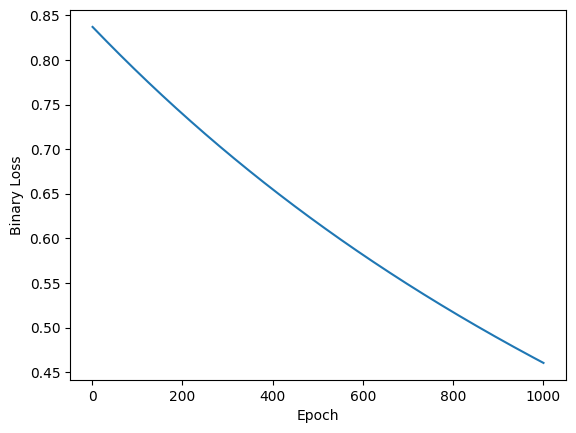

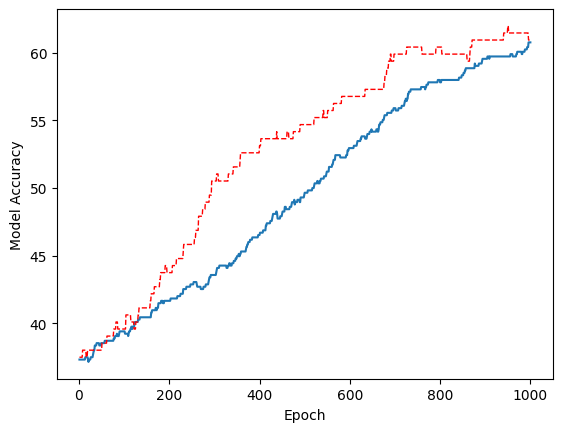

The selected learning rate: 0.0001
Epoch 100/1000, Train Loss: 0.8319, Train Accuracy: 37.33, Test Accuracy: 38.02
Epoch 200/1000, Train Loss: 0.8267, Train Accuracy: 37.15, Test Accuracy: 38.02
Epoch 300/1000, Train Loss: 0.8215, Train Accuracy: 37.67, Test Accuracy: 38.02
Epoch 400/1000, Train Loss: 0.8164, Train Accuracy: 38.54, Test Accuracy: 38.02
Epoch 500/1000, Train Loss: 0.8113, Train Accuracy: 38.54, Test Accuracy: 38.02
Epoch 600/1000, Train Loss: 0.8062, Train Accuracy: 38.72, Test Accuracy: 38.54
Epoch 700/1000, Train Loss: 0.8012, Train Accuracy: 38.72, Test Accuracy: 39.06
Epoch 800/1000, Train Loss: 0.7962, Train Accuracy: 39.06, Test Accuracy: 39.58
Epoch 900/1000, Train Loss: 0.7913, Train Accuracy: 39.41, Test Accuracy: 39.58
Epoch 1000/1000, Train Loss: 0.7864, Train Accuracy: 39.41, Test Accuracy: 39.58


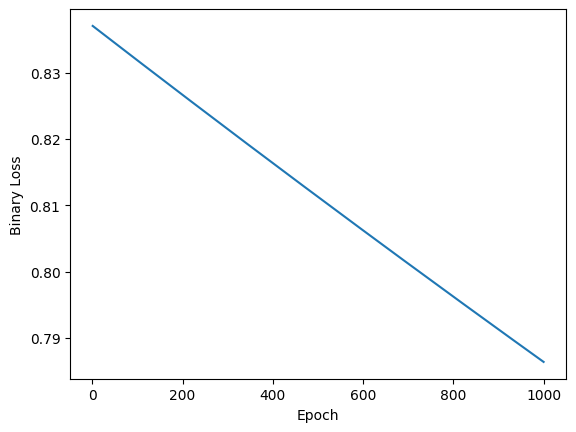

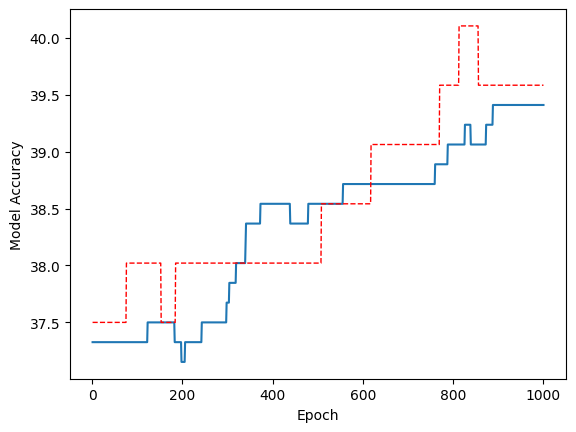

In [16]:
## Initialize the Model
num_epochs = 1000

for learning_rate in [1e-1,0.05,1e-2,1e-3,1e-4]:
    torch.manual_seed(0)
    print(f'The selected learning rate: {learning_rate}')
    model = SingleLayerPerceptron(input_size=8)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)   # You can adjust the learning rate

    train_loss, train_accuracy, test_accuracy = train_network(model=model, 
                                                            optimizer=optimizer, 
                                                            criterion=criterion, 
                                                            X_train=X_train_tensor, 
                                                            y_train=y_train_tensor, 
                                                            X_test=X_test_tensor, 
                                                            y_test=y_test_tensor, 
                                                            num_epochs=num_epochs
                                                            )
    metric_output = [train_loss, train_accuracy, test_accuracy]
    plot_performance_loss(metric_output)
    plot_performance_accuracy(metric_output)

### MLP with 1 Hidden Layer, vary number of node

The selected number of node: 16
Epoch 100/1000, Train Loss: -0.2605, Train Accuracy: 48.44, Test Accuracy: 45.31
Epoch 200/1000, Train Loss: -3.4505, Train Accuracy: 67.36, Test Accuracy: 66.67
Epoch 300/1000, Train Loss: -4.8069, Train Accuracy: 71.18, Test Accuracy: 68.75
Epoch 400/1000, Train Loss: -5.5674, Train Accuracy: 72.22, Test Accuracy: 70.83
Epoch 500/1000, Train Loss: -6.0660, Train Accuracy: 73.44, Test Accuracy: 72.40
Epoch 600/1000, Train Loss: -6.3284, Train Accuracy: 73.09, Test Accuracy: 72.92
Epoch 700/1000, Train Loss: -6.4956, Train Accuracy: 72.92, Test Accuracy: 72.92
Epoch 800/1000, Train Loss: -6.6950, Train Accuracy: 73.09, Test Accuracy: 73.44
Epoch 900/1000, Train Loss: -6.9286, Train Accuracy: 72.74, Test Accuracy: 71.88
Epoch 1000/1000, Train Loss: -7.1574, Train Accuracy: 72.92, Test Accuracy: 71.88


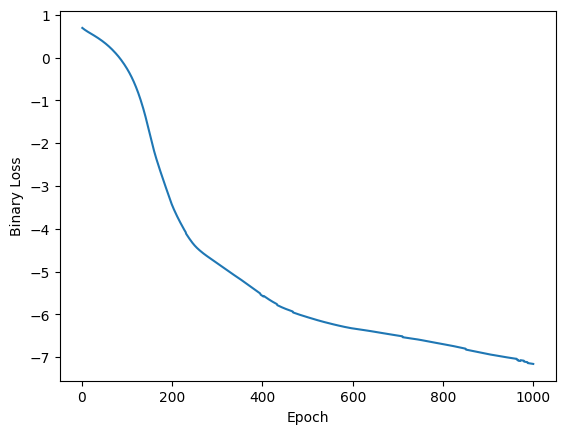

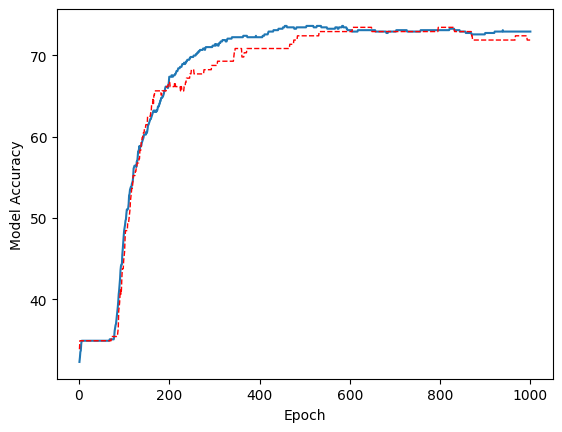

The selected number of node: 32
Epoch 100/1000, Train Loss: -0.7130, Train Accuracy: 63.02, Test Accuracy: 62.50
Epoch 200/1000, Train Loss: -3.8663, Train Accuracy: 68.06, Test Accuracy: 67.71
Epoch 300/1000, Train Loss: -4.9442, Train Accuracy: 71.18, Test Accuracy: 69.27
Epoch 400/1000, Train Loss: -5.5282, Train Accuracy: 73.09, Test Accuracy: 72.40
Epoch 500/1000, Train Loss: -5.9975, Train Accuracy: 73.09, Test Accuracy: 72.40
Epoch 600/1000, Train Loss: -6.2867, Train Accuracy: 73.26, Test Accuracy: 73.44
Epoch 700/1000, Train Loss: -6.4632, Train Accuracy: 72.92, Test Accuracy: 74.48
Epoch 800/1000, Train Loss: -6.6093, Train Accuracy: 73.78, Test Accuracy: 74.48
Epoch 900/1000, Train Loss: -6.7324, Train Accuracy: 74.13, Test Accuracy: 74.48
Epoch 1000/1000, Train Loss: -6.8697, Train Accuracy: 74.31, Test Accuracy: 74.48


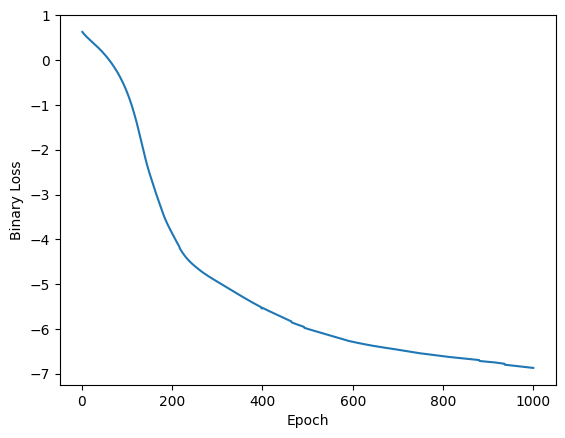

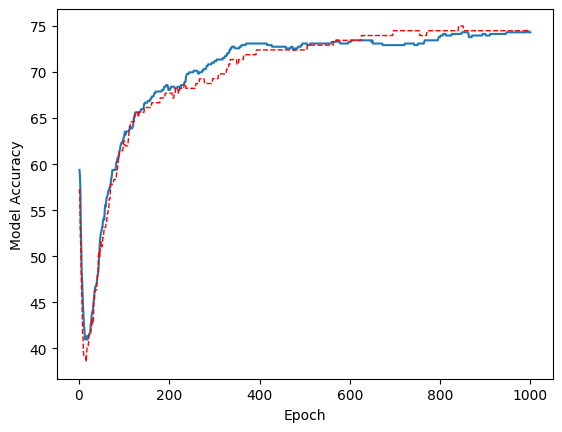

The selected number of node: 64
Epoch 100/1000, Train Loss: -1.0850, Train Accuracy: 63.72, Test Accuracy: 63.02
Epoch 200/1000, Train Loss: -3.9347, Train Accuracy: 68.40, Test Accuracy: 67.19
Epoch 300/1000, Train Loss: -5.0083, Train Accuracy: 70.66, Test Accuracy: 69.79
Epoch 400/1000, Train Loss: -5.5791, Train Accuracy: 71.35, Test Accuracy: 70.31
Epoch 500/1000, Train Loss: -5.9404, Train Accuracy: 72.05, Test Accuracy: 70.83
Epoch 600/1000, Train Loss: -6.1975, Train Accuracy: 72.22, Test Accuracy: 71.88
Epoch 700/1000, Train Loss: -6.3903, Train Accuracy: 73.26, Test Accuracy: 72.92
Epoch 800/1000, Train Loss: -6.5290, Train Accuracy: 73.96, Test Accuracy: 71.88
Epoch 900/1000, Train Loss: -6.6333, Train Accuracy: 74.31, Test Accuracy: 71.35
Epoch 1000/1000, Train Loss: -6.7389, Train Accuracy: 75.00, Test Accuracy: 70.83


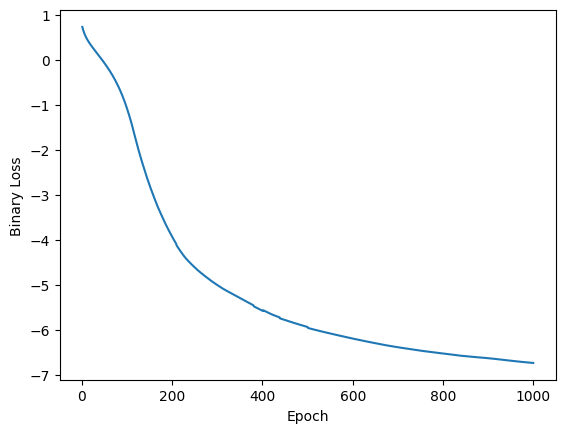

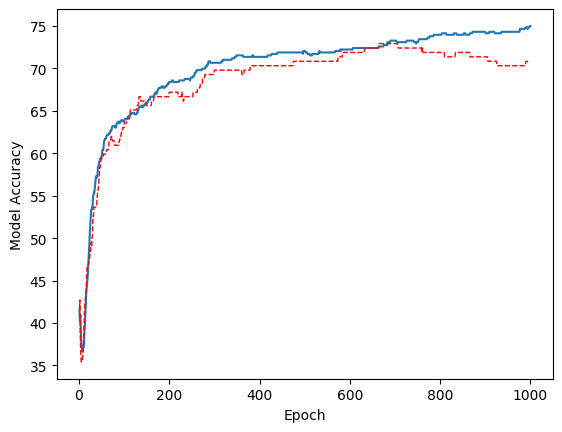

In [17]:
## model setting
class MLP_1l_node(nn.Module):
    def __init__(self, input_size, num_node):
        super(MLP_1l_node, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, num_node)
        self.out = torch.nn.Linear(num_node, 1)
                
         ## Activation function
        self.ReLU = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.ReLU(x)
        x = self.out(x)
        x = self.sigmoid(x)
        return x
    
## Initialize the Model
num_epochs = 1000
learning_rate = 0.05

for i in [16,32,64]:
    print(f'The selected number of node: {i}')
    torch.manual_seed(0)
    model = MLP_1l_node(8,i)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)  # You can adjust the learning rate

    train_loss, train_accuracy, test_accuracy = train_network(model=model, 
                                                            optimizer=optimizer, 
                                                            criterion=criterion, 
                                                            X_train=X_train_tensor, 
                                                            y_train=y_train_tensor, 
                                                            X_test=X_test_tensor, 
                                                            y_test=y_test_tensor, 
                                                            num_epochs=num_epochs
                                                            )
    metric_output = [train_loss, train_accuracy, test_accuracy]
    plot_performance_loss(metric_output)
    plot_performance_accuracy(metric_output)

### MLP with 2 Hidden Layer, vary number of node

The selected number of node: 16,
Epoch 100/1000, Train Loss: -1.2823, Train Accuracy: 58.51, Test Accuracy: 57.81
Epoch 200/1000, Train Loss: -6.1533, Train Accuracy: 73.78, Test Accuracy: 73.44
Epoch 300/1000, Train Loss: -6.8244, Train Accuracy: 76.22, Test Accuracy: 73.96
Epoch 400/1000, Train Loss: -7.1559, Train Accuracy: 76.74, Test Accuracy: 74.48
Epoch 500/1000, Train Loss: -7.5089, Train Accuracy: 76.74, Test Accuracy: 74.48
Epoch 600/1000, Train Loss: -7.8152, Train Accuracy: 76.56, Test Accuracy: 72.92
Epoch 700/1000, Train Loss: -8.2174, Train Accuracy: 77.26, Test Accuracy: 72.92
Epoch 800/1000, Train Loss: -8.7692, Train Accuracy: 76.91, Test Accuracy: 73.96
Epoch 900/1000, Train Loss: -9.4795, Train Accuracy: 76.74, Test Accuracy: 73.44
Epoch 1000/1000, Train Loss: -10.5505, Train Accuracy: 76.91, Test Accuracy: 72.92


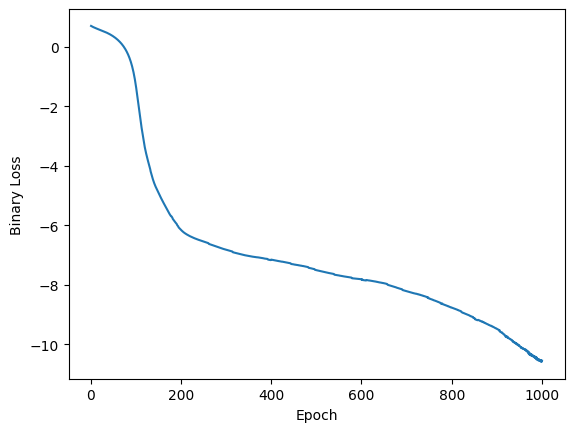

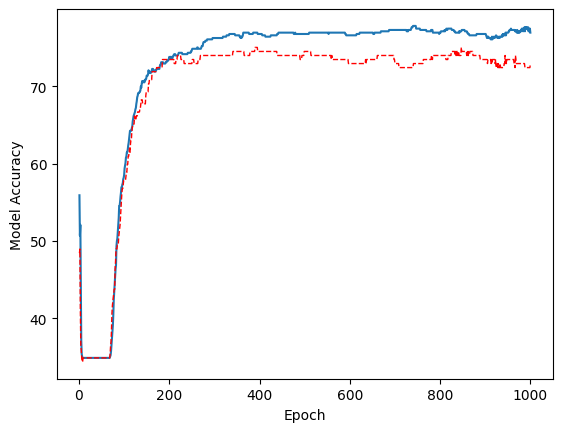

The selected number of node: 32,
Epoch 100/1000, Train Loss: -3.4695, Train Accuracy: 68.06, Test Accuracy: 66.67
Epoch 200/1000, Train Loss: -6.2733, Train Accuracy: 73.61, Test Accuracy: 72.92
Epoch 300/1000, Train Loss: -6.9298, Train Accuracy: 75.52, Test Accuracy: 75.00
Epoch 400/1000, Train Loss: -7.3999, Train Accuracy: 76.56, Test Accuracy: 73.44
Epoch 500/1000, Train Loss: -8.0723, Train Accuracy: 76.39, Test Accuracy: 72.92
Epoch 600/1000, Train Loss: -8.6557, Train Accuracy: 76.39, Test Accuracy: 73.44
Epoch 700/1000, Train Loss: -9.3367, Train Accuracy: 77.26, Test Accuracy: 72.92
Epoch 800/1000, Train Loss: -10.2363, Train Accuracy: 76.91, Test Accuracy: 70.83
Epoch 900/1000, Train Loss: -10.8635, Train Accuracy: 77.78, Test Accuracy: 69.79
Epoch 1000/1000, Train Loss: -11.4096, Train Accuracy: 79.17, Test Accuracy: 68.23


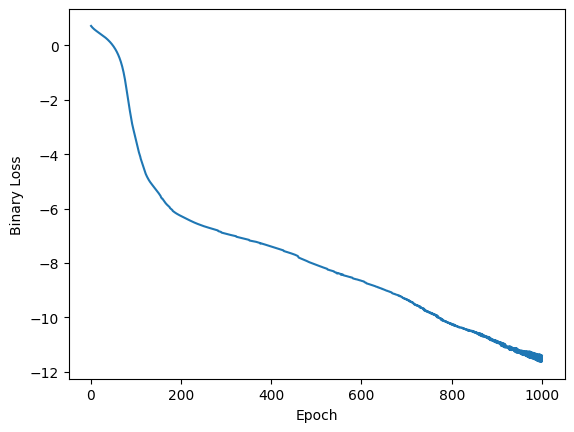

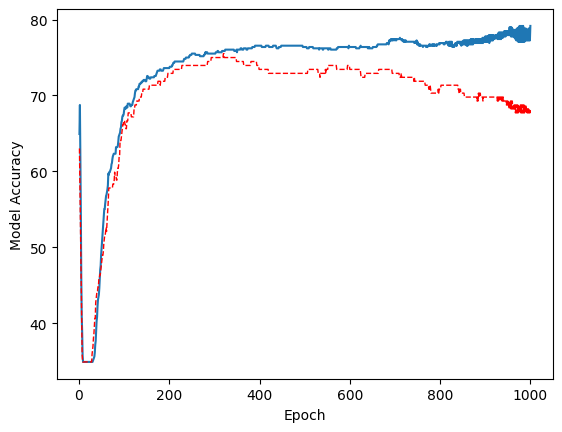

The selected number of node: 64,
Epoch 100/1000, Train Loss: -4.1155, Train Accuracy: 69.10, Test Accuracy: 67.19
Epoch 200/1000, Train Loss: -6.4129, Train Accuracy: 73.26, Test Accuracy: 72.40
Epoch 300/1000, Train Loss: -7.0584, Train Accuracy: 75.52, Test Accuracy: 74.48
Epoch 400/1000, Train Loss: -7.9510, Train Accuracy: 76.56, Test Accuracy: 71.88
Epoch 500/1000, Train Loss: -8.6449, Train Accuracy: 77.43, Test Accuracy: 71.88
Epoch 600/1000, Train Loss: -9.3670, Train Accuracy: 77.60, Test Accuracy: 70.31
Epoch 700/1000, Train Loss: -10.2205, Train Accuracy: 77.60, Test Accuracy: 69.79
Epoch 800/1000, Train Loss: -10.9858, Train Accuracy: 78.30, Test Accuracy: 71.35
Epoch 900/1000, Train Loss: -11.3821, Train Accuracy: 82.47, Test Accuracy: 69.27
Epoch 1000/1000, Train Loss: -11.8785, Train Accuracy: 85.42, Test Accuracy: 68.23


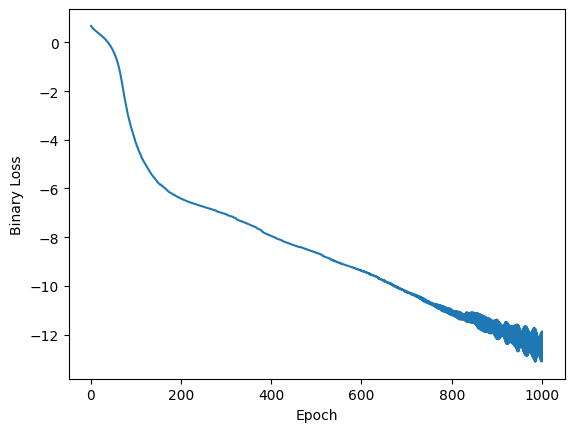

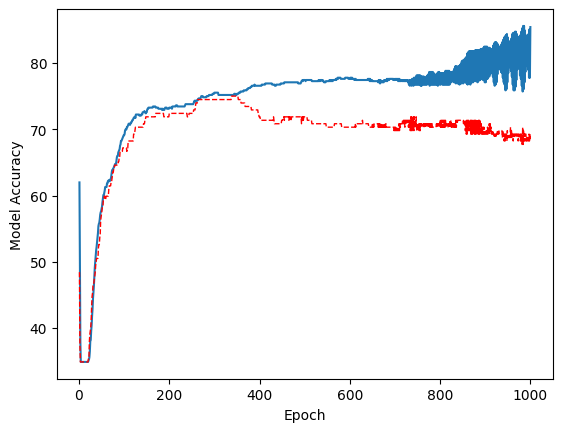

In [18]:
## model setting
class MLP_2l_node(nn.Module):
    def __init__(self, input_size, num_node):
        super(MLP_2l_node, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, num_node*2)
        self.fc2 = torch.nn.Linear(num_node*2, num_node*4)
        self.out = torch.nn.Linear(num_node*4, 1)
        
         ## Activation function
        self.ReLU = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.ReLU(x)
        x = self.fc2(x)
        x = self.ReLU(x)
        x = self.out(x)
        x = self.sigmoid(x)
        return x
    
## Initialize the Model
num_epochs = 1000
learning_rate = 0.05

for i in [16,32,64]:
    print(f'The selected number of node: {i},')
    torch.manual_seed(0)
    model = MLP_2l_node(8,i)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)  # You can adjust the learning rate

    train_loss, train_accuracy, test_accuracy = train_network(model=model, 
                                                            optimizer=optimizer, 
                                                            criterion=criterion, 
                                                            X_train=X_train_tensor, 
                                                            y_train=y_train_tensor, 
                                                            X_test=X_test_tensor, 
                                                            y_test=y_test_tensor, 
                                                            num_epochs=num_epochs
                                                            )
    metric_output = [train_loss, train_accuracy, test_accuracy]
    plot_performance_loss(metric_output)
    plot_performance_accuracy(metric_output)